# Introduction

In this exercise, we focus on understanding the traits and preferences of users in a music streaming platform context. The goal is to generate a dataset based on user behavior, specifically focusing on how users interact with songs based on their individual preferences. By analyzing users' ratings of songs, we can gain insights into the underlying segments that categorize users based on their tastes and preferences.

To achieve this, we define a series of functions that allow us to simulate the key aspects of this recommendation system:

* generate_entities(): This function generates a set of songs, each characterized by a variety of attributes such as genre, release year, duration and other musical features. These attributes help define the song's appeal to different user personalities.

* generate_users(): This function creates users, each belonging to one of five distinct personality segments. Each segment has unique traits, such as preferences for certain music genres, age, educational level which influence the likelihood of a user liking or disliking a song.

* generate_ratings(): This function generates binary ratings (like or dislike) for each user-song interaction. The ratings are determined primarily by user preferences but are influenced by a small degree of randomness (noise) to simulate real-world unpredictability.

* learn_segments(): This function analyzes the generated ratings to identify and extract customer segments using clustering techniques. It leverages the ratings data to discover patterns in user preferences and groups users based on shared characteristics.

The goal of this exercise is to explore the traits of users on a streaming platform, identify underlying segments based on user preferences, and generate meaningful insights for improving music recommendations. Through this process, we gain a better understanding of user personalities and how they influence their interaction with content.

In [ ]:
import random
import pandas as pd
import numpy as np
from dataclasses import dataclass
from typing import List, Tuple
import csv


# Generate songs

The generate_entities() function generates a list of song entities, each characterized by 10 distinct attributes. These attributes include various aspects of the song and its artist, such as genre, popularity, release year, language, and more. The function accepts a parameter songs_num, which defines the number of songs to generate.

Key attributes of each song are:

* Genre: Chosen from a predefined list of music genres, with probabilistic weights assigned to each genre.

* Artist Popularity: Generated based on a Gaussian distribution, representing the artist's monthly listeners (in millions) on a platform like Spotify.

* Active Artist: A boolean indicating whether the artist is still active, with a set probability.

* Release Year: Randomly selected from a range between 1980 and 2025.

* Language: Chosen from a list of popular languages with corresponding probabilities.

* Duration: Generated using a Gaussian distribution to model song length, with a minimum duration of 30 seconds.

* Collaboration: Indicates whether the song is a solo track or a collaboration, with a given chance for collaboration.

* Positive Vibes: A float value between 0 and 1 that represents the overall "feel-good" energy of the song.

* Listening Context: A list of up to four categories describing where the song is typically listened to, such as "Workout" or "Party."

* Cover/Remix: A categorical value that denotes whether the song is an original, cover, or remix, with probabilities assigned to each type.

This function provides a flexible way to simulate a large dataset of songs with diverse characteristics, which can be used for recommendation systems and user segmentation analysis.

In [ ]:
"""
Attribute Descriptions:

- genre: The primary music genre of the song, chosen from Pop, Rock, Jazz, Classical, Hip-Hop, or Techno, with given probabilities.
- artist_popularity_mil: The popularity of the artist in terms of Spotify monthly listeners (in millions), generated from a Gaussian distribution (mean=7, std=5).
- active_artist: A boolean value indicating whether the artist is still performing live (65% chance of being active).
- release_year: The year the song was released, randomly chosen between 1980 and 2025.
- language: The primary language of the song, selected from English, Spanish, French, German, or Korean with specified probabilities.
- duration: The length of the song in seconds, drawn from a Gaussian distribution (mean=210, std=45), ensuring a minimum duration of 30 seconds.
- collaboration: A boolean indicating if the song is a solo track or a collaboration, with a 30% chance of being a collaboration.
- positive_vibes: A float value between 0 and 1 representing the overall feel-good energy of the song.
- listening_context: A list of up to 4 categories describing where the song is typically listened to, chosen from Workout, Party, Focus, Driving, Relaxation, or Travelling.
- cover_remix: A categorical variable indicating whether the song is an original, a cover, or a remix, assigned with respective probabilities (50%, 30%, 20%).
"""

@dataclass
class Song:
    genre: str
    artist_popularity_mil: float
    active_artist: bool
    release_year: int
    language: str
    duration: int
    collaboration: bool
    positive_vibes: float
    listening_context: List[str]
    cover_remix: str

def generate_entities(songs_num: int = 1000) -> List[Song]:
    genres = ["Pop", "Rock", "Jazz", "Classical", "Hip-Hop", "Techno"]
    genre_probs = [0.4, 0.2, 0.1, 0.1, 0.15, 0.05]

    languages = ["English", "Spanish", "French", "German", "Korean"]
    language_probs = [0.65, 0.15, 0.1, 0.05, 0.05]

    listening_context_options = ["Workout", "Party", "Focus", "Driving", "Relaxation", "Travelling"]

    cover_remix_options = ["Original", "Cover", "Remix"]
    cover_remix_probs = [0.5, 0.3, 0.2]

    songs = []

    for _ in range(songs_num):
        genre = np.random.choice(genres, p=genre_probs)
        artist_popularity_mil = round(max(0, np.random.normal(7, 5)), 1)
        active_artist = random.random() < 0.65
        release_year = random.randint(1980, 2025)
        language = np.random.choice(languages, p=language_probs)
        duration = max(30, int(np.random.normal(210, 45)))
        collaboration = random.random() < 0.3
        positive_vibes = round(random.uniform(0, 1), 2)

        num_contexts = random.randint(1, 4)
        listening_context = random.sample(listening_context_options, num_contexts)

        cover_remix = np.random.choice(cover_remix_options, p=cover_remix_probs)

        songs.append(
            Song(
                genre=genre,
                artist_popularity_mil=artist_popularity_mil,
                active_artist=active_artist,
                release_year=release_year,
                language=language,
                duration=duration,
                collaboration=collaboration,
                positive_vibes=positive_vibes,
                listening_context=listening_context,
                cover_remix=cover_remix
            )
        )

    return songs




In [ ]:
songs=generate_entities(songs_num=1000)

In [ ]:
songs[2]

Song(genre=np.str_('Pop'), artist_popularity_mil=10.2, active_artist=True, release_year=2006, language=np.str_('English'), duration=217, collaboration=False, positive_vibes=0.08, listening_context=['Driving'], cover_remix=np.str_('Original'))

# Generate User Segments

The generate_users() function is responsible for generating a diverse set of user profiles, segmented into five distinct customer groups. Each segment is based on unique characteristics that reflect the preferences and behaviors of different user types. The function generates users for each segment with specific attributes, such as gender, age, favorite genres, location, education level, and relationship status.

This function takes in five parameters, each specifying the number of users to generate for a given segment. The segments represent distinct user personas and are outlined below:

**Segment 1: Classic Music Enthusiasts**

* Gender Distribution: 70% male, 30% female

* Age: Typically 60 years old, with a Gaussian distribution centered around 60 years

* Location: 80% live in Rural Areas, 10% in Big Cities, and 10% in Suburbs

* Education Level: 60% Postgraduate, 30% Graduate, 5% College, 5% High School

* Relationship Status: 70% Married, 30% Single

* Favorite Genres: 70% Classical, 20% Jazz, and 10% randomly selected from Pop, Rock, Hip-Hop, or Techno

**Segment 2: Young Trendsetters**

* Gender Distribution: 60% male, 40% female

* Age: Typically 25 years old, with a Gaussian distribution centered around 25 years

* Location: 90% live in Big Cities, 10% in Suburbs

* Education Level: 50% Graduate, 30% Postgraduate, 20% College

* Relationship Status: 60% Single, 40% In a Relationship

* Favorite Genres: Two favorite genres, with a preference for contemporary and energetic genres such as Pop, Hip-Hop, Techno, and Rock

**Segment 3: Party Enthusiasts**

* Gender Distribution: Random distribution between male and female

* Age: Typically 28 years old, with a Gaussian distribution centered around 28 years

* Location: 20% live in Big Cities, 80% in Suburbs

* Education Level: 30% High School, 70% College

* Relationship Status: 70% Single, 30% In a Relationship

* Favorite Genres: 80% Techno as the first favorite, and a randomly selected second genre (never Techno)

**Segment 4: Nostalgic Listeners**

* Gender Distribution: 30% male, 70% female

* Age: Typically 45 years old, with a Gaussian distribution centered around 45 years

* Location: 60% live in Rural Areas, 20% in Big Cities, and 20% in Suburbs

* Education Level: 50% High School, 50% Postgraduate

* Relationship Status: 70% Married, 30% Single

* Favorite Genres: 70% Rock as the first favorite, and a randomly selected second genre (not Rock)

**Segment 5: Chill & Relax Audience**

* Gender Distribution: Random distribution between male and female

* Age: Typically 35 years old, with a Gaussian distribution centered around 35 years

* Location: 80% live in Rural Areas, 10% in Big Cities, and 10% in Suburbs

* Education Level: 60% Postgraduate, 30% Graduate, 5% College, and 5% High School

* Relationship Status: 20% Single, 80% In a Relationship

* Favorite Genres: 60% Hip-Hop, 30% Classical, and 10% randomly selected from Jazz, Rock, Pop, or Techno




The generate_users() function combines the user generation logic for each of the five segments, assigning each user a unique user_id starting from 1. For each segment, users are generated based on the characteristics specified, ensuring that each segment has distinct distributions for gender, age, location, education level, relationship status, and music preferences. The function returns a complete list of users, making it ideal for creating diverse datasets for recommendation systems or user behavior analysis.

This section provides a thorough explanation of how the user generation process works and highlights the unique characteristics of each segment.



In [ ]:
# User class definition
@dataclass
class User:
    user_id: int
    gender: str
    age: int
    favorite_genres: List[str]
    location: str
    education_level: str
    relationship_status: str
    segment: str

# Available genres for all users
available_genres = ['Pop', 'Rock', 'Jazz', 'Classical', 'Hip-Hop', 'Techno']

In [ ]:
import random
from typing import List

"""
Generates a list of users for Segment 1: Classic Music Enthusiasts.

Characteristics:
- 70% of users are male, and 30% are female.
- Users have a Gaussian-distributed age centered around 60 years old.
- 80% of users live in Rural Areas, while 10% live in Big Cities and 10% in Suburbs.
- Education levels are distributed as follows: 60% Postgraduate, 30% Graduate, 5% College, and 5% High School.
- Relationship status is 70% Married and 30% Single.
- Each user has one favorite music genre: 70% Classical, 20% Jazz, and 10% randomly chosen from Pop, Rock, Hip-Hop, or Techno.

Args:
- user_num (int): Number of users to generate (default: 1000).

Returns:
- List[User]: A list of generated users.
"""

def generate_users_segment1(user_num: int = 1000) -> List[User]:
    available_genres = ['Pop', 'Rock', 'Jazz', 'Classical', 'Hip-Hop', 'Techno']

    users = [
        User(
            user_id=None,
            gender=random.choices(["M", "F"], weights=[0.7, 0.3])[0],
            age=max(0, int(random.gauss(60, 7))),  # Ensure non-negative age
            favorite_genres=[random.choices(
                ['Classical', 'Jazz', random.choice(['Pop', 'Rock', 'Hip-Hop', 'Techno'])],
                weights=[0.7, 0.2, 0.1]
            )[0]],
            location=random.choices(['Rural Area', 'Big City', 'Suburb'], weights=[0.8, 0.1, 0.1])[0],
            education_level=random.choices(['Postgraduate', 'Graduate', 'College', 'High School'], weights=[0.6, 0.3, 0.05, 0.05])[0],
            relationship_status=random.choices(['Married', 'Single'], weights=[0.7, 0.3])[0],
            segment=1
        )
        for _ in range(user_num)
    ]

    return users


In [ ]:
import random
from typing import List

"""
Generates a list of users for Segment 2: Young Trendsetters.

Characteristics:
- 60% of users are male, and 40% are female.
- Users have a Gaussian-distributed age centered around 25 years old.
- 90% of users live in Big Cities, while 10% live in Suburbs.
- Education levels are distributed as follows: 50% Graduate, 30% Postgraduate, and 20% College.
- Relationship status is 60% Single and 40% In a Relationship.
- Each user has two favorite music genres, with a preference for contemporary and energetic genres such as Pop, Hip-Hop, Techno, and Rock.

Args:
- user_num (int): Number of users to generate (default: 1000).

Returns:
- List[User]: A list of generated users.
"""

def generate_users_segment2(user_num: int = 1000) -> List[User]:
    available_genres = ['Pop', 'Rock', 'Jazz', 'Classical', 'Hip-Hop', 'Techno']

    users = [
        User(
            user_id=None,
            gender=random.choices(["M", "F"], weights=[0.6, 0.4])[0],
            age=max(0, int(random.gauss(25, 5))),  # Ensure non-negative age
            favorite_genres=random.sample(
                random.choices(
                    ['Pop', 'Hip-Hop', 'Techno', 'Rock', 'Jazz', 'Classical'],
                    weights=[0.3, 0.3, 0.2, 0.1, 0.05, 0.05],
                    k=2
                ),
                2
            ),
            location=random.choices(['Big City', 'Suburb'], weights=[0.9, 0.1])[0],
            education_level=random.choices(['Graduate', 'Postgraduate', 'College'], weights=[0.5, 0.3, 0.2])[0],
            relationship_status=random.choices(['Single', 'In a Relationship'], weights=[0.6, 0.4])[0],
            segment=2
        )
        for _ in range(user_num)
    ]

    return users


In [ ]:
"""
Generates a list of users for Segment 3: Party Enthusiasts.

Characteristics:
- Users are typically 28 years old, with a Gaussian distribution of ages.
- Users have two favorite genres, with 80% selecting Techno as their first favorite, and the second genre chosen randomly from the available genres (never the same as the first).
- They mostly live in Suburbs (80%), with some living in Big Cities (20%).
- Education levels are distributed as follows: 30% High School, 70% College.
- Relationship status is 70% Single and 30% In a Relationship.

Args:
- user_num (int): Number of users to generate (default: 1000).

Returns:
- List[User]: A list of generated users.
"""

def generate_users_segment3(user_num: int = 1000) -> List[User]:
    available_genres = ['Pop', 'Rock', 'Jazz', 'Classical', 'Hip-Hop', 'Techno']

    users = [
        User(
            user_id=None,
            gender=random.choice(["M", "F"]),
            age=max(0, int(random.gauss(28, 6))),  # Ensure non-negative age
            favorite_genres=[
                random.choices(['Techno', random.choice([genre for genre in available_genres if genre != 'Techno'])], weights=[0.8, 0.2])[0],  # 80% Techno as the first favorite
                random.choice([genre for genre in available_genres if genre != 'Techno'])  # Second genre random but not Techno
            ],
            location=random.choices(['Big City', 'Suburb'], weights=[0.2, 0.8])[0],  # 20% Big City, 80% Suburb
            education_level=random.choices(['High School', 'College'], weights=[0.3, 0.7])[0],  # 30% High School, 70% College
            relationship_status=random.choices(['Single', 'In a Relationship'], weights=[0.7, 0.3])[0],  # 70% Single, 30% In a Relationship
            segment=3
        )
        for _ in range(user_num)
    ]
    return users


In [ ]:
"""
Generates a list of users for Segment 4: Nostalgic Listeners.

Characteristics
-30% Males and 70% Females
- Users are typically 45 years old, with a Gaussian distribution of ages.
- Users have two favorite genres, with 70% selecting Rock as their first favorite, and the second genre chosen randomly from the available genres (never the same as the first).
- They mostly live in Rural Area(60%), Suburbs (20%) with some living in Big Cities (20%).
- Education levels are distributed as follows: 30% High School, 70% College.
- Relationship status is 70% Single and 30% In a Relationship.

Args:
- user_num (int): Number of users to generate (default: 1000).

Returns:
- List[User]: A list of generated users.
"""


# Function to generate users for Segment 4: Nostalgic Listeners
def generate_users_segment4(user_num: int = 1000) -> List[User]:
    available_genres = ['Pop', 'Rock', 'Jazz', 'Classical', 'Hip-Hop', 'Techno']

    users = [
        User(user_id= None,
            gender=random.choices(["M", "F"], weights=[0.3, 0.7])[0],
            age=max(0, int(random.gauss(45, 8))),
            favorite_genres=[
                random.choices(['Rock', random.choice([genre for genre in available_genres if genre != 'Rock'])], weights=[0.7, 0.3])[0],  # 80% Techno as the first favorite
                random.choice([genre for genre in available_genres if genre != 'Rock'])  # Second genre random but not Techno
            ],
            location=random.choices(['Rural Area', 'Big City', 'Suburb'], weights=[0.6, 0.2,0.2])[0],  # 20% Big City, 80% Suburb
            education_level=random.choices(['High School', 'Postgraduate'], weights=[0.5, 0.5])[0],  # 50% High School, 50% Postgraduate
            relationship_status=random.choices(['Married', 'Single'], weights=[0.7, 0.3])[0],  #  70% Married, 30% Single
            segment=4
        )
        for _ in range(user_num)
    ]
    return users

In [ ]:
"""
Generates a list of users for Segment 5: Chill & Relax Audience.

Characteristics:
-Users are typically 35 years old, with a Gaussian distribution of ages (mean = 35, standard deviation = 10).
-80% of users live in Rural Areas, 10% in Big Cities, and 10% in Suburbs.
-Education levels are distributed as follows: 60% Postgraduate, 30% Graduate, 5% College, and 5% High School.
-Each user has one favorite music genre:60% Hip-Hop, 30% Classical, 10% randomly chosen from Jazz, Rock, Pop, Techno,20% of users are Single, and 80% are in a Relationship.

Args:
- user_num (int): Number of users to generate (default: 1000).

Returns:
- List[User]: A list of generated users.
"""


# Function to generate users for Segment 5: Chill & Relax Audience
def generate_users_segment5(user_num: int = 1000) -> List[User]:
    locations = ['Suburb', 'Rural Area']
    education_levels = ['College', 'Graduate', 'Postgraduate']
    relationship_statuses = ['Single', 'In a Relationship', 'Married']

    users = [
        User(user_id= None,
            gender=random.choice(["M", "F"]),
            age=max(0, int(random.gauss(35, 10))),
            favorite_genres=[random.choices(
                ['Hip-Hop', 'Classical', random.choice(['Jazz', 'Rock', 'Pop', 'Techno'])],
                weights=[0.6, 0.3, 0.1]
            )[0]],
            location=random.choices(['Big City', 'Suburb'], weights=[0.7, 0.3])[0],  # 20% Big City, 80% Suburb
            education_level=random.choices(['Postgraduate', 'Graduate', 'College', 'High School'], weights=[0.1, 0.3, 0.2, 0.4])[0],
            relationship_status=random.choices(['Single', 'In a Relationship'], weights=[0.2, 0.8])[0],  # 20% Single, 80% In a Relationship
            segment=5
        )
        for _ in range(user_num)
    ]
    return users

In [ ]:
def generate_users(user_num1: int = 100, user_num2: int = 100, user_num3: int = 100, user_num4: int = 100, user_num5: int = 100) -> List[User]:
    users = []
    user_id = 1  # Start user_id from 1

    for user in generate_users_segment1(user_num1):
        user.user_id = user_id
        users.append(user)
        user_id += 1

    for user in generate_users_segment2(user_num2):
        user.user_id = user_id
        users.append(user)
        user_id += 1

    for user in generate_users_segment3(user_num3):
        user.user_id = user_id
        users.append(user)
        user_id += 1

    for user in generate_users_segment4(user_num4):
        user.user_id = user_id
        users.append(user)
        user_id += 1

    for user in generate_users_segment5(user_num5):
        user.user_id = user_id
        users.append(user)
        user_id += 1

    return users

In [ ]:
users_for_review=generate_users(user_num1= 100, user_num2= 100, user_num3= 100, user_num4= 100, user_num5= 100)

In [ ]:
len(users_for_review)

500

In [ ]:
## Sample of users for a specific segment

filtered_users = [user for user in users_for_review if user.segment == 3]

# Print the first 10 users with segment 1
for user in filtered_users[:10]:
    print(user)

User(user_id=201, gender='M', age=20, favorite_genres=['Techno', 'Hip-Hop'], location='Suburb', education_level='College', relationship_status='In a Relationship', segment=3)
User(user_id=202, gender='M', age=14, favorite_genres=['Techno', 'Pop'], location='Suburb', education_level='College', relationship_status='In a Relationship', segment=3)
User(user_id=203, gender='M', age=20, favorite_genres=['Techno', 'Rock'], location='Suburb', education_level='High School', relationship_status='Single', segment=3)
User(user_id=204, gender='F', age=25, favorite_genres=['Techno', 'Pop'], location='Suburb', education_level='College', relationship_status='In a Relationship', segment=3)
User(user_id=205, gender='F', age=26, favorite_genres=['Jazz', 'Hip-Hop'], location='Suburb', education_level='High School', relationship_status='In a Relationship', segment=3)
User(user_id=206, gender='M', age=34, favorite_genres=['Techno', 'Hip-Hop'], location='Suburb', education_level='High School', relationship_s

# Generate Ratings

**Overview of the generate_ratings() Function bold text**

The generate_ratings() function is designed to simulate the process of generating music ratings for users across multiple predefined user segments. It does so by evaluating different criteria for users and songs, generating ratings, and combining them into a single final dataset. The function follows these major steps:

**Segmented Rating Generation:**

* The function generates ratings for users in five distinct segments (Segment 1 to Segment 5). Each segment has its own specific criteria for generating ratings based on user attributes and song features (e.g., genre, song duration, artist popularity, etc.).

* Each segment is handled by a separate function (generate_ratings_segment_1, generate_ratings_segment_2, etc.), which applies a unique set of rules to generate ratings for that specific segment. The function parameters, such as the number of ratings and noise factor, are consistent across all segments.

**Rating Criteria:**

* Each segment uses different criteria to determine whether a user will rate a song positively or negatively. These criteria include song attributes such as genre, language, release year, artist popularity, collaboration status, and user-specific factors like favorite genres, listening context, and personal preferences.

* Additionally, a noise factor is introduced to simulate the inconsistency in users' behavior by randomly flipping ratings.

**File Output for Each Segment:**

* The ratings for each segment are written to separate CSV files (segment1.csv, segment2.csv, etc.). These files are generated using the predefined rules for each user segment.

**Combining Results:**

* After generating the ratings for all segments, the function reads all the CSV files and combines them into a single Pandas DataFrame. This is done using the pd.read_csv() function for each segment file and the pd.concat() function to merge them into one unified dataset.

**Shuffling and Final Selection:**

* Once all the ratings are combined, the resulting dataset is shuffled using sample(frac=1, random_state=42) to ensure randomness in the order of ratings.

* Finally, the function selects the top num_ratings rows from the shuffled dataset, ensuring that the output is consistent with the requested number of ratings.

**Return Value:**

The final dataset, containing the requested number of ratings, is returned as a Pandas DataFrame. The DataFrame includes detailed information such as user attributes (e.g., gender, age, segment), song details (e.g., genre, artist popularity, duration), and the generated ratings with the corresponding reasoning behind each rating.

**Purpose and Use**

The generate_ratings() function is used to simulate user behavior in music recommendation systems, where ratings are generated based on specific user preferences, song characteristics, and noise factors.

In [ ]:
import csv
import random
from typing import List

def generate_ratings_segment_1(users: List[User], songs: List[Song], num_ratings: int, noise: float = 0.1, output_file: str = 'segment1.csv') -> None:
    """
    Generates a fixed number of ratings for users in Segment 1 based on multiple criteria.

    Rating Process:
    - Starts with a base rating ratio of **0.4**.
    - Adjusts the rating based on:
        - **Genre Matching**: (+20% for match, -20% for mismatch)
        - **Artist Popularity (millions)**: (+10% for 3M-10M, -20% for <1M or >20M)
        - **Release Year**: (+15% before 2000, -25% after 2000)
        - **Song Duration**: (+15% for 3-6 min, -30% for <3 min)
        - **Language Preference**: (+15% for English/Italian/German, -20% for Spanish/Korean)
    - If the final ratio is **>0.5**, assigns a **positive rating (+1)**, otherwise **negative rating (-1)**.
    - **Noise Factor**: Introduces a probability (`noise`) of flipping the rating to simulate inconsistent behavior.

    Args:
    - users (List[User]): List of user objects.
    - songs (List[Song]): List of song objects.
    - num_ratings (int): Total number of ratings to generate.
    - noise (float): Probability of flipping a rating due to inconsistent behavior (default: 0.1).
    - output_file (str): CSV filename for storing ratings.

    Returns:
    - None (Writes ratings to a CSV file).
    """

    # Filter users to only include those from Segment 1
    segment1_users = [user for user in users if user.segment == 1]

    with open(output_file, 'w', newline='') as fw:
        writer = csv.writer(fw)
        writer.writerow([
            'user_id','user_gender', 'user_age', 'user_favorite_genres', 'location', 'education_level',
            'relationship_status', 'segment',
            'song_genre', 'artist_popularity_mil', 'active_artist', 'release_year',
            'language', 'duration', 'collaboration', 'positive_vibes',
            'listening_context', 'cover_remix', 'rating', 'reason'
        ])

        positive_ratings = 0
        total_ratings = 0

        remaining_ratings = num_ratings

        while remaining_ratings > 0:
            for user in segment1_users:
                max_ratings_for_user = min(5, remaining_ratings)
                rating_count = random.randint(1, max_ratings_for_user)
                remaining_ratings -= rating_count
                total_ratings += rating_count

                sampled_songs = random.sample(songs, rating_count)

                for song in sampled_songs:
                    rating_ratio = 0  # Base rating ratio
                    positive_reason = []
                    negative_reason = []

                    # Genre Rule
                    if song.genre in user.favorite_genres:
                        rating_ratio += 0.2
                        positive_reason.append("Liked due to genre match")
                    else:
                        rating_ratio -= 0
                        negative_reason.append("Disliked due to genre mismatch")

                    # Artist Popularity (in millions) Rule
                    if 3 <= song.artist_popularity_mil <= 10:
                        rating_ratio += 0.1
                        positive_reason.append("Preferred artist popularity (3M-10M listeners)")
                    elif song.artist_popularity_mil >= 20 or song.artist_popularity_mil < 1:
                        rating_ratio -= 0
                        negative_reason.append("Less preferred artist popularity (<1M or 20M+ listeners)")

                    # Release Year Rule
                    if song.release_year < 2000:
                        rating_ratio += 0.2
                        positive_reason.append("Preferred classic song (before 2000)")
                    else:
                        rating_ratio -= 0
                        negative_reason.append("Less preferred recent song (after 2000)")

                    # Song Duration Rule
                    if 180 <= song.duration <= 360:
                        rating_ratio += 0.15
                        positive_reason.append("Preferred song duration (3-6 minutes)")
                    elif song.duration < 180:
                        rating_ratio -= 0
                        negative_reason.append("Less preferred short song (<3 minutes)")

                    # Language Rule
                    if song.language in ["English", "Italian", "German"]:
                        rating_ratio += 0.15
                        positive_reason.append("Preferred song language")
                    elif song.language in ["Spanish", "Korean"]:
                        rating_ratio -= 0
                        negative_reason.append("Less preferred song language")

                    # Final rating decision
                    rating = 1 if rating_ratio > 0.5 else -1
                    final_reason = positive_reason if rating == 1 else negative_reason

                    # Apply noise (flip rating with probability 'noise')
                    if random.random() < noise:
                        rating *= -1
                        final_reason = ["Rating was flipped due to inconsistent behavior"]

                    # Track positive ratings
                    if rating == 1:
                        positive_ratings += 1

                    # Write to file
                    writer.writerow([
                        user.user_id,user.gender, user.age, user.favorite_genres, user.location,
                        user.education_level, user.relationship_status, user.segment,
                        song.genre, song.artist_popularity_mil, song.active_artist,
                        song.release_year, song.language, song.duration, song.collaboration,
                        song.positive_vibes, song.listening_context, song.cover_remix,
                        rating, "; ".join(final_reason)
                    ])

                if remaining_ratings <= 0:
                    break

        print(f'Positive Ratings: {positive_ratings / total_ratings:.2%} ({positive_ratings}/{total_ratings})')


In [ ]:
import csv
import random
from typing import List

def generate_ratings_segment_2(users: List[User], songs: List[Song], num_ratings: int, noise: float = 0.1, output_file: str = 'segment2.csv') -> None:
    """
    Generates a fixed number of ratings for users in Segment 2 (Young Trendsetters) based on multiple criteria.

    Rating Process:
    - Starts with a base rating ratio of **0.4**.
    - Adjusts the rating based on:
        - **Genre Matching**: (+25% for match, -10% for mismatch)
        - **Artist Popularity (millions)**: (+15% for >10M, -10% for <2M)
        - **Release Year**: (+20% for 2010 or later, -15% before 2000)
        - **Collaboration**: (+10% for collaboration, -5% for solo track)
        - **Positive Vibes**: (+15% if >0.6, -30% if <0.3)
        - **Listening Context**: (+20% for Party or Workout, -20% for Focus or Relaxation)
        - **Cover/Remix**: (+10% for Remix, -20% for Cover, 0% for Original)
    - If the final ratio is **>0.5**, assigns a **positive rating (+1)**, otherwise **negative rating (-1)**.
    - **Noise Factor**: Introduces a probability (`noise`) of flipping a rating to simulate inconsistent behavior.

    Args:
    - users (List[User]): List of user objects.
    - songs (List[Song]): List of song objects.
    - num_ratings (int): Total number of ratings to generate.
    - noise (float): Probability of flipping a rating due to inconsistent behavior (default: 0.1).
    - output_file (str): CSV filename for storing ratings.

    Returns:
    - None (Writes ratings to a CSV file).
    """

    # Filter users to only include those from Segment 2
    segment2_users = [user for user in users if user.segment == 2]

    with open(output_file, 'w', newline='') as fw:
        writer = csv.writer(fw)
        writer.writerow([
            'user_id','user_gender', 'user_age', 'user_favorite_genres', 'location', 'education_level',
            'relationship_status', 'segment',
            'song_genre', 'artist_popularity_mil', 'active_artist', 'release_year',
            'language', 'duration', 'collaboration', 'positive_vibes',
            'listening_context', 'cover_remix', 'rating', 'reason'
        ])

        positive_ratings = 0
        total_ratings = 0

        remaining_ratings = num_ratings

        while remaining_ratings > 0:
            for user in segment2_users:
                max_ratings_for_user = min(5, remaining_ratings)
                rating_count = random.randint(1, max_ratings_for_user)
                remaining_ratings -= rating_count
                total_ratings += rating_count

                sampled_songs = random.sample(songs, rating_count)

                for song in sampled_songs:
                    rating_ratio = 0  # Base rating ratio
                    positive_reason = []
                    negative_reason = []

                    # Genre Rule
                    if song.genre in user.favorite_genres:
                        rating_ratio += 0.2
                        positive_reason.append("Liked due to genre match")
                    else:
                        rating_ratio -= 0
                        negative_reason.append("Disliked due to genre mismatch")

                    # Artist Popularity Rule (in millions)
                    if song.artist_popularity_mil > 10:
                        rating_ratio += 0.15
                        positive_reason.append("Liked due to artist popularity (>10M listeners)")
                    elif song.artist_popularity_mil < 2:
                        rating_ratio -= 0
                        negative_reason.append("Disliked due to artist popularity (<2M listeners)")

                    # Release Year Rule
                    if song.release_year >= 2010:
                        rating_ratio += 0.2
                        positive_reason.append("Liked due to recent release (2010 or later)")
                    elif song.release_year < 2000:
                        rating_ratio -= 0
                        negative_reason.append("Disliked due to old release (before 2000)")

                    # Collaboration Rule
                    if song.collaboration:
                        rating_ratio += 0.1
                        positive_reason.append("Liked due to collaboration")
                    else:
                        rating_ratio -= 0
                        negative_reason.append("Disliked due to solo track")

                    # Positive Vibes Rule
                    if song.positive_vibes > 0.6:
                        rating_ratio += 0.15
                        positive_reason.append("Liked due to positive vibes")
                    elif song.positive_vibes < 0.3:
                        rating_ratio -= 0
                        negative_reason.append("Disliked due to low positive vibes")

                    # Listening Context Rule
                    if any(context in song.listening_context for context in ["Party", "Workout"]):
                        rating_ratio += 0.2
                        positive_reason.append("Liked due to listening context (Party or Workout)")
                    elif any(context in song.listening_context for context in ["Focus", "Relaxation"]):
                        rating_ratio -= 0
                        negative_reason.append("Disliked due to listening context (Focus or Relaxation)")

                    # Cover/Remix Rule
                    if song.cover_remix == "Remix":
                        rating_ratio += 0.2
                        positive_reason.append("Liked due to remix version")
                    elif song.cover_remix == "Cover":
                        rating_ratio -= 0
                        negative_reason.append("Disliked due to cover version")

                    # Final rating decision
                    rating = 1 if rating_ratio > 0.5 else -1
                    final_reason = positive_reason if rating == 1 else negative_reason

                    # Apply noise (flip rating with probability 'noise')
                    if random.random() < noise:
                        rating *= -1
                        final_reason = ["Rating was flipped due to inconsistent behavior"]

                    # Track positive ratings
                    if rating == 1:
                        positive_ratings += 1

                    # Write to file
                    writer.writerow([
                        user.user_id,user.gender, user.age, user.favorite_genres, user.location,
                        user.education_level, user.relationship_status, user.segment,
                        song.genre, song.artist_popularity_mil, song.active_artist,
                        song.release_year, song.language, song.duration, song.collaboration,
                        song.positive_vibes, song.listening_context, song.cover_remix,
                        rating, "; ".join(final_reason)
                    ])

                if remaining_ratings <= 0:
                    break

        print(f'Positive Ratings: {positive_ratings / total_ratings:.2%} ({positive_ratings}/{total_ratings})')


In [ ]:
import csv
import random
from typing import List

def generate_ratings_segment_3(users: List[User], songs: List[Song], num_ratings: int, noise: float = 0.1, output_file: str = 'segment3.csv') -> None:
    """
    Generates a fixed number of ratings for users in Segment 3 based on multiple criteria.

    Rating Process:
    - Starts with a base rating ratio of **0.3**.
    - Adjusts the rating based on:
        - **Genre Matching**: (+10% for match, -10% for mismatch)
        - **Song Duration**: (+10% for 3-5 min, -15% for <3 min)
        - **Listening Context**: (+20% for Party or Workout, -30% for Focus or Relaxation)
        - **Positive Vibes**: (+20% if >0.7, -20% if <0.4)
        - **Collaboration**: (+10% for collaboration, -5% for solo track)
        - **Active Artist**: (+30% if artist is active, -30% if inactive)
    - If the final ratio is **>0.5**, assigns a **positive rating (+1)**, otherwise **negative rating (-1)**.
    - **Noise Factor**: Introduces a probability (`noise`) of flipping the rating to simulate inconsistent behavior.

    Args:
    - users (List[User]): List of user objects.
    - songs (List[Song]): List of song objects.
    - num_ratings (int): Total number of ratings to generate.
    - noise (float): Probability of flipping a rating due to inconsistent behavior (default: 0.1).
    - output_file (str): CSV filename for storing ratings.

    Returns:
    - None (Writes ratings to a CSV file).
    """

    # Filter users to only include those from Segment 3
    segment3_users = [user for user in users if user.segment == 3]

    with open(output_file, 'w', newline='') as fw:
        writer = csv.writer(fw)
        writer.writerow([
            'user_id','user_gender', 'user_age', 'user_favorite_genres', 'location', 'education_level',
            'relationship_status', 'segment',
            'song_genre', 'artist_popularity_mil', 'active_artist', 'release_year',
            'language', 'duration', 'collaboration', 'positive_vibes',
            'listening_context', 'cover_remix', 'rating', 'reason'
        ])

        positive_ratings = 0
        total_ratings = 0

        remaining_ratings = num_ratings

        while remaining_ratings > 0:
            for user in segment3_users:
                max_ratings_for_user = min(5, remaining_ratings)
                rating_count = random.randint(1, max_ratings_for_user)
                remaining_ratings -= rating_count
                total_ratings += rating_count

                sampled_songs = random.sample(songs, rating_count)

                for song in sampled_songs:
                    rating_ratio = 0  # Base rating ratio
                    positive_reason = []
                    negative_reason = []

                    # Genre Rule
                    if song.genre in user.favorite_genres:
                        rating_ratio += 0.1
                        positive_reason.append("Liked due to genre match")
                    else:
                        rating_ratio -= 0
                        negative_reason.append("Disliked due to genre mismatch")

                    # Song Duration Rule
                    if 180 <= song.duration <= 300:
                        rating_ratio += 0.15
                        positive_reason.append("Preferred song duration (3-5 minutes)")
                    elif song.duration < 180:
                        rating_ratio -= 0
                        negative_reason.append("Less preferred short song (<3 minutes)")

                    # Listening Context Rule
                    if "Party" in song.listening_context or "Workout" in song.listening_context:
                        rating_ratio += 0.15
                        positive_reason.append("Preferred listening context (Party or Workout)")
                    elif "Focus" in song.listening_context or "Relaxation" in song.listening_context:
                        rating_ratio -= 0
                        negative_reason.append("Less preferred listening context (Focus or Relaxation)")

                    # Positive Vibes Rule
                    if song.positive_vibes > 0.7:
                        rating_ratio += 0.2
                        positive_reason.append("Preferred song with high positive vibes")
                    elif song.positive_vibes < 0.4:
                        rating_ratio -= 0
                        negative_reason.append("Less preferred song with low positive vibes")

                    # Collaboration Rule
                    if song.collaboration:
                        rating_ratio += 0.1
                        positive_reason.append("Preferred due to artist collaboration")
                    else:
                        rating_ratio -= 0
                        negative_reason.append("Less preferred solo track")

                    # Active Artist Rule
                    if song.active_artist:
                        rating_ratio += 0.1
                        positive_reason.append("Preferred active artist")
                    else:
                        rating_ratio -= 0
                        negative_reason.append("Less preferred inactive artist")

                    # Final rating decision
                    rating = 1 if rating_ratio > 0.5 else -1
                    final_reason = positive_reason if rating == 1 else negative_reason

                    # Apply noise (flip rating with probability 'noise')
                    if random.random() < noise:
                        rating *= -1
                        final_reason = ["Rating was flipped due to inconsistent behavior"]

                    # Track positive ratings
                    if rating == 1:
                        positive_ratings += 1

                    # Write to file
                    writer.writerow([
                        user.user_id,user.gender, user.age, user.favorite_genres, user.location,
                        user.education_level, user.relationship_status, user.segment,
                        song.genre, song.artist_popularity_mil, song.active_artist,
                        song.release_year, song.language, song.duration, song.collaboration,
                        song.positive_vibes, song.listening_context, song.cover_remix,
                        rating, "; ".join(final_reason)
                    ])

                if remaining_ratings <= 0:
                    break

        print(f'Positive Ratings: {positive_ratings / total_ratings:.2%} ({positive_ratings}/{total_ratings})')


In [ ]:
import csv
import random
from typing import List

def generate_ratings_segment_4(users: List[User], songs: List[Song], num_ratings: int, noise: float = 0.1, output_file: str = 'segment4.csv') -> None:
    """
    Generates a fixed number of ratings for users in Segment 4 based on multiple criteria.

    Rating Process:
    - Starts with a base rating ratio of **0.4**.
    - Adjusts the rating based on:
        - **Language Preference**: (+10% for English/German, -20% for Spanish/Korean)
        - **Release Year**: (+20% for before 1990, -30% for after 2010)
        - **Artist Popularity (millions)**: (+5% for 1M-10M, -30% for >20M)
        - **Collaboration**: (-25% for collaboration, +5% for solo track)
    - If the final ratio is **>0.5**, assigns a **positive rating (+1)**, otherwise **negative rating (-1)**.
    - **Noise Factor**: Introduces a probability (`noise`) of flipping the rating to simulate inconsistent behavior.

    Args:
    - users (List[User]): List of user objects.
    - songs (List[Song]): List of song objects.
    - num_ratings (int): Total number of ratings to generate.
    - noise (float): Probability of flipping a rating due to inconsistent behavior (default: 0.1).
    - output_file (str): CSV filename for storing ratings.

    Returns:
    - None (Writes ratings to a CSV file).
    """

    # Filter users to only include those from Segment 4
    segment4_users = [user for user in users if user.segment == 4]

    with open(output_file, 'w', newline='') as fw:
        writer = csv.writer(fw)
        writer.writerow([
            'user_id','user_gender', 'user_age', 'user_favorite_genres', 'location', 'education_level',
            'relationship_status', 'segment',
            'song_genre', 'artist_popularity_mil', 'active_artist', 'release_year',
            'language', 'duration', 'collaboration', 'positive_vibes',
            'listening_context', 'cover_remix', 'rating', 'reason'
        ])

        positive_ratings = 0
        total_ratings = 0

        remaining_ratings = num_ratings

        while remaining_ratings > 0:
            for user in segment4_users:
                max_ratings_for_user = min(5, remaining_ratings)
                rating_count = random.randint(1, max_ratings_for_user)
                remaining_ratings -= rating_count
                total_ratings += rating_count

                sampled_songs = random.sample(songs, rating_count)

                for song in sampled_songs:
                    rating_ratio = 0  # Base rating ratio
                    positive_reason = []
                    negative_reason = []

                    # Language Rule
                    if song.language in ["English", "German"]:
                        rating_ratio += 0.1
                        positive_reason.append("Preferred song language (English/German)")
                    elif song.language in ["Spanish", "Korean"]:
                        rating_ratio -= 0
                        negative_reason.append("Less preferred song language (Spanish/Korean)")

                    # Release Year Rule
                    if song.release_year < 1990:
                        rating_ratio += 0.15
                        positive_reason.append("Preferred classic song (before 1990)")
                    elif song.release_year > 2010:
                        rating_ratio -= 0
                        negative_reason.append("Less preferred recent song (after 2010)")

                    # Artist Popularity Rule
                    if 1 <= song.artist_popularity_mil <= 10:
                        rating_ratio += 0.3
                        positive_reason.append("Preferred artist popularity (1M-10M listeners)")
                    elif song.artist_popularity_mil > 20:
                        rating_ratio -= 0
                        negative_reason.append("Less preferred artist popularity (>20M listeners)")

                    # Collaboration Rule
                    if song.collaboration:
                        rating_ratio -= 0
                        negative_reason.append("Less preferred due to collaboration")
                    else:
                        rating_ratio += 0.2
                        positive_reason.append("Preferred solo track")

                    # Final rating decision
                    rating = 1 if rating_ratio > 0.5 else -1
                    final_reason = positive_reason if rating == 1 else negative_reason

                    # Apply noise (flip rating with probability 'noise')
                    if random.random() < noise:
                        rating *= -1
                        final_reason = ["Rating was flipped due to inconsistent behavior"]

                    # Track positive ratings
                    if rating == 1:
                        positive_ratings += 1

                    # Write to file
                    writer.writerow([
                        user.user_id,user.gender, user.age, user.favorite_genres, user.location,
                        user.education_level, user.relationship_status, user.segment,
                        song.genre, song.artist_popularity_mil, song.active_artist,
                        song.release_year, song.language, song.duration, song.collaboration,
                        song.positive_vibes, song.listening_context, song.cover_remix,
                        rating, "; ".join(final_reason)
                    ])

                if remaining_ratings <= 0:
                    break

        print(f'Positive Ratings: {positive_ratings / total_ratings:.2%} ({positive_ratings}/{total_ratings})')


In [ ]:
import csv
import random
from typing import List

def generate_ratings_segment_5(users: List[User], songs: List[Song], num_ratings: int, noise: float = 0.1, output_file: str = 'segment5.csv') -> None:
    """
    Generates a fixed number of ratings for users in Segment 5 based on multiple criteria.

    Rating Process:
    - Starts with a base rating ratio of **0.35**.
    - Adjusts the rating based on:
        - **Genre Matching**: (+25% for match, -25% for mismatch)
        - **Song Duration**: (+15% for 4-6 min, -10% for <3 min)
        - **Listening Context**: (+20% for Relaxation or Focus, -10% for Party or Workout)
        - **Positive Vibes**: (+15% if 0.4-0.7, -10% if <0.3 or >0.8)
        - **Cover/Remix**: (+10% for Original, -10% for Remix)
    - If the final ratio is **>0.5**, assigns a **positive rating (+1)**, otherwise **negative rating (-1)**.
    - **Noise Factor**: Introduces a probability (`noise`) of flipping the rating to simulate inconsistent behavior.

    Args:
    - users (List[User]): List of user objects.
    - songs (List[Song]): List of song objects.
    - num_ratings (int): Total number of ratings to generate.
    - noise (float): Probability of flipping a rating due to inconsistent behavior (default: 0.1).
    - output_file (str): CSV filename for storing ratings.

    Returns:
    - None (Writes ratings to a CSV file).
    """

    # Filter users to only include those from Segment 5
    segment5_users = [user for user in users if user.segment == 5]

    with open(output_file, 'w', newline='') as fw:
        writer = csv.writer(fw)
        writer.writerow([
            'user_id','user_gender', 'user_age', 'user_favorite_genres', 'location', 'education_level',
            'relationship_status', 'segment',
            'song_genre', 'artist_popularity_mil', 'active_artist', 'release_year',
            'language', 'duration', 'collaboration', 'positive_vibes',
            'listening_context', 'cover_remix', 'rating', 'reason'
        ])

        positive_ratings = 0
        total_ratings = 0

        remaining_ratings = num_ratings

        while remaining_ratings > 0:
            for user in segment5_users:
                max_ratings_for_user = min(5, remaining_ratings)
                rating_count = random.randint(1, max_ratings_for_user)
                remaining_ratings -= rating_count
                total_ratings += rating_count

                sampled_songs = random.sample(songs, rating_count)

                for song in sampled_songs:
                    rating_ratio = 0  # Base rating ratio
                    positive_reason = []
                    negative_reason = []

                    # Genre Rule
                    if song.genre in user.favorite_genres:
                        rating_ratio += 0.2
                        positive_reason.append("Liked due to genre match")
                    else:
                        rating_ratio -= 0
                        negative_reason.append("Disliked due to genre mismatch")

                    # Song Duration Rule
                    if 240 <= song.duration <= 360:
                        rating_ratio += 0.15
                        positive_reason.append("Preferred song duration (4-6 minutes)")
                    elif song.duration < 180:
                        rating_ratio -= 0
                        negative_reason.append("Less preferred short song (<3 minutes)")

                    # Listening Context Rule
                    if "Relaxation" in song.listening_context or "Focus" in song.listening_context:
                        rating_ratio += 0.2
                        positive_reason.append("Preferred listening context (Relaxation/Focus)")
                    elif "Party" in song.listening_context or "Workout" in song.listening_context:
                        rating_ratio -= 0
                        negative_reason.append("Less preferred listening context (Party/Workout)")

                    # Positive Vibes Rule
                    if 0.4 <= song.positive_vibes <= 0.7:
                        rating_ratio += 0.15
                        positive_reason.append("Preferred song positivity (0.4-0.7)")
                    elif song.positive_vibes < 0.3 or song.positive_vibes > 0.8:
                        rating_ratio -= 0
                        negative_reason.append("Less preferred song positivity (<0.3 or >0.8)")

                    # Cover/Remix Rule
                    if song.cover_remix == "Original":
                        rating_ratio += 0.2
                        positive_reason.append("Preferred original version")
                    elif song.cover_remix == "Remix":
                        rating_ratio -= 0
                        negative_reason.append("Less preferred remix version")

                    # Final rating decision
                    rating = 1 if rating_ratio > 0.5 else -1
                    final_reason = positive_reason if rating == 1 else negative_reason

                    # Apply noise (flip rating with probability 'noise')
                    if random.random() < noise:
                        rating *= -1
                        final_reason = ["Rating was flipped due to inconsistent behavior"]

                    # Track positive ratings
                    if rating == 1:
                        positive_ratings += 1

                    # Write to file
                    writer.writerow([
                        user.user_id,user.gender, user.age, user.favorite_genres, user.location,
                        user.education_level, user.relationship_status, user.segment,
                        song.genre, song.artist_popularity_mil, song.active_artist,
                        song.release_year, song.language, song.duration, song.collaboration,
                        song.positive_vibes, song.listening_context, song.cover_remix,
                        rating, "; ".join(final_reason)
                    ])

                if remaining_ratings <= 0:
                    break

        print(f'Positive Ratings: {positive_ratings / total_ratings:.2%} ({positive_ratings}/{total_ratings})')


In [ ]:
import pandas as pd

def generate_ratings(users: List[User], songs: List[Song], num_ratings: int, noise: float = 0.1) -> pd.DataFrame:

    # Generate ratings for each segment
    generate_ratings_segment_1(users, songs, num_ratings, noise, output_file='segment1.csv')
    generate_ratings_segment_2(users, songs, num_ratings, noise, output_file='segment2.csv')
    generate_ratings_segment_3(users, songs, num_ratings, noise, output_file='segment3.csv')
    generate_ratings_segment_4(users, songs, num_ratings, noise, output_file='segment4.csv')
    generate_ratings_segment_5(users, songs, num_ratings, noise, output_file='segment5.csv')

    # List of segment files
    segment_files = ['segment1.csv', 'segment2.csv', 'segment3.csv', 'segment4.csv', 'segment5.csv']

    # Read and combine all CSV files into a single DataFrame
    df_list = [pd.read_csv(file) for file in segment_files]
    combined_df = pd.concat(df_list, ignore_index=True)

    # Shuffle the combined dataset
    shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Select the final number of ratings
    final_df = shuffled_df.head(num_ratings)

    return final_df

In [ ]:
# Generate ratings and see also the positive ratings per segment

df_ratings=generate_ratings(users_for_review,songs,num_ratings=50000, noise=0.1)

Positive Ratings: 22.36% (11180/50000)
Positive Ratings: 40.20% (20101/50000)
Positive Ratings: 26.06% (13029/50000)
Positive Ratings: 36.60% (18298/50000)
Positive Ratings: 26.89% (13443/50000)


In [ ]:
# Generated 50000 ratings

df_ratings.shape

(50000, 20)

In [ ]:
# Ratings per users from different sigments

df_ratings['segment'].value_counts()

,count
segment,
5,10200
3,10036
2,9938
4,9914
1,9912


In [ ]:
# Distribution of positive and negative values

df_ratings['rating'].value_counts()

,count
rating,
-1,34986
1,15014


In [ ]:
df_ratings.head(5)

,user_id,user_gender,user_age,user_favorite_genres,location,education_level,relationship_status,segment,song_genre,artist_popularity_mil,active_artist,release_year,language,duration,collaboration,positive_vibes,listening_context,cover_remix,rating,reason
0,55,M,57,['Classical'],Rural Area,Postgraduate,Married,1,Rock,2.4,True,2014,English,218,True,0.23,"['Driving', 'Focus']",Cover,-1,Disliked due to genre mismatch; Less preferred...
1,198,M,28,"['Hip-Hop', 'Pop']",Big City,Graduate,In a Relationship,2,Jazz,1.1,False,2012,English,161,True,0.89,"['Relaxation', 'Focus', 'Party']",Original,1,Liked due to recent release (2010 or later); L...
2,20,M,57,['Classical'],Rural Area,Postgraduate,Single,1,Rock,0.0,True,2008,English,257,False,0.44,"['Focus', 'Relaxation', 'Travelling', 'Workout']",Remix,-1,Disliked due to genre mismatch; Less preferred...
3,253,M,29,"['Rock', 'Classical']",Suburb,College,Single,3,Pop,7.2,True,1990,English,185,True,0.26,"['Workout', 'Travelling', 'Relaxation', 'Party']",Original,-1,Disliked due to genre mismatch; Less preferred...
4,342,F,52,"['Pop', 'Techno']",Rural Area,Postgraduate,Single,4,Pop,9.4,True,1995,English,232,False,0.41,"['Party', 'Travelling', 'Relaxation', 'Focus']",Original,1,Preferred song language (English/German); Pref...


# Learn Segments

## Ratings Exploration

In this section, we begin by exploring the generated dataset to gain a better understanding of its structure and the distribution of values. We start by printing the head of the DataFrame to preview the first few rows, providing an initial glimpse of the data. This allows us to confirm that the ratings, user, and song-related columns are appropriately populated.

Next, we select the relevant columns that are directly related to the problem at hand. These selected columns will typically include user characteristics (e.g., age, gender, segment) and song attributes (e.g., genre, duration, release year), along with the generated ratings and reasons. By narrowing down the columns, we focus on the most important features that can be used in our analysis or model training.

Finally, we apply the .describe() method to obtain descriptive statistics for the selected columns. This provides valuable insights into the distribution of numerical features, such as mean, standard deviation, minimum, and maximum values. Additionally, it helps in identifying any potential anomalies, outliers, or skewed distributions in the data, which may require preprocessing before moving forward with any analysis or machine learning tasks.

This exploration phase helps to ensure that the data is well-structured and ready for further analysis or model development.

In [ ]:
df_ratings_new=df_ratings[['user_id','user_gender', 'user_age', 'user_favorite_genres', 'location',
       'education_level', 'relationship_status', 'song_genre',
       'artist_popularity_mil', 'active_artist', 'release_year', 'language',
       'duration', 'collaboration', 'positive_vibes', 'listening_context',
       'cover_remix','segment','rating']]

In [ ]:
df_ratings_new.head()

,user_id,user_gender,user_age,user_favorite_genres,location,education_level,relationship_status,song_genre,artist_popularity_mil,active_artist,release_year,language,duration,collaboration,positive_vibes,listening_context,cover_remix,segment,rating
0,55,M,57,['Classical'],Rural Area,Postgraduate,Married,Rock,2.4,True,2014,English,218,True,0.23,"['Driving', 'Focus']",Cover,1,-1
1,198,M,28,"['Hip-Hop', 'Pop']",Big City,Graduate,In a Relationship,Jazz,1.1,False,2012,English,161,True,0.89,"['Relaxation', 'Focus', 'Party']",Original,2,1
2,20,M,57,['Classical'],Rural Area,Postgraduate,Single,Rock,0.0,True,2008,English,257,False,0.44,"['Focus', 'Relaxation', 'Travelling', 'Workout']",Remix,1,-1
3,253,M,29,"['Rock', 'Classical']",Suburb,College,Single,Pop,7.2,True,1990,English,185,True,0.26,"['Workout', 'Travelling', 'Relaxation', 'Party']",Original,3,-1
4,342,F,52,"['Pop', 'Techno']",Rural Area,Postgraduate,Single,Pop,9.4,True,1995,English,232,False,0.41,"['Party', 'Travelling', 'Relaxation', 'Focus']",Original,4,1


In [ ]:
df_ratings_new.describe()

,user_id,user_age,artist_popularity_mil,release_year,duration,positive_vibes,segment,rating
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,251.620120,38.392860,7.220696,2002.762920,212.238860,0.499615,3.011040,-0.399440
std,144.432696,15.228774,4.781220,13.097165,45.391043,0.290479,1.416304,0.916769
min,1.000000,10.000000,0.000000,1980.000000,43.000000,0.000000,1.000000,-1.000000
25%,126.000000,26.000000,3.700000,1991.000000,182.000000,0.240000,2.000000,-1.000000
50%,252.000000,35.000000,6.800000,2003.000000,213.000000,0.500000,3.000000,-1.000000
75%,377.000000,51.000000,10.500000,2014.000000,244.000000,0.760000,4.000000,1.000000
max,500.000000,79.000000,22.300000,2025.000000,378.000000,1.000000,5.000000,1.000000


## Data Preprocessing and Transformation

In this section, we focus on preparing the data for further analysis by transforming it into a format that is more suitable for machine learning models. The preprocessing involves several key steps, including feature encoding, bucketing of continuous variables, and the transformation of categorical data.

First, the function preprocess_user_data selects the relevant columns from the raw data, including user demographics, song information, and rating details. It then applies one-hot encoding to the user’s favorite genres and listening contexts to capture this information in a binary format, allowing it to be used effectively in modeling.

Next, numerical columns such as release year, age, duration, and artist popularity are bucketed into discrete categories. This transformation simplifies the analysis by grouping continuous variables into predefined ranges, making the data more interpretable.

Additionally, the function converts categorical columns like gender, location, and education level into binary columns using one-hot encoding. This ensures that each unique value in these categories is represented as a separate binary feature.

Finally, the function prepares the dataset by ensuring that all columns, excluding certain identifiers and target variables, are represented as binary features (0 or 1), making the data ready for machine learning algorithms.

In [ ]:
import pandas as pd

def preprocess_user_data(df_ratings):

    df_ratings_new=df_ratings[['user_id','user_gender', 'user_age', 'user_favorite_genres', 'location',
       'education_level', 'relationship_status', 'song_genre',
       'artist_popularity_mil', 'active_artist', 'release_year', 'language',
       'duration', 'collaboration', 'positive_vibes', 'listening_context',
       'cover_remix','segment','rating']]
    # Provided genre and context lists
    genres = ["Pop", "Rock", "Jazz", "Classical", "Hip-Hop", "Techno"]
    listening_context_options = ["Workout", "Party", "Focus", "Driving", "Relaxation", "Travelling"]

    # Step 1: One-hot encode user favorite genres
    for genre in genres:
        genre_column = f'favorite_genre_{genre.lower().replace(" ", "_")}'
        df_ratings_new[genre_column] = df_ratings_new['user_favorite_genres'].apply(lambda x: 1 if genre in x else 0)

    # Step 2: One-hot encode listening contexts
    for context in listening_context_options:
        context_column = f'listening_context_{context.lower().replace(" ", "_")}'
        df_ratings_new[context_column] = df_ratings_new['listening_context'].apply(lambda x: 1 if context in x else 0)

    # Step 3: Drop the original 'user_favorite_genres' and 'listening_context' columns
    df_ratings_new.drop(columns=['user_favorite_genres', 'listening_context'], inplace=True)

    # Step 4: Bucket numerical columns
    # Bucket 'release_year' into ranges (<1990, 1990-2000, 2000-2010, 2010-2020, >2020)
    df_ratings_new['release_year_group'] = pd.cut(df_ratings_new['release_year'],
                                          bins=[-float('inf'), 1990, 2000, 2010, 2020, float('inf')],
                                          labels=['<1990', '1990-2000', '2000-2010', '2010-2020', '>2020'])

    # Bucket 'user_age' into ranges (<20, 20-30, 30-40, 40-50, 50-60, 60-70, >70)
    df_ratings_new['age_group'] = pd.cut(df_ratings_new['user_age'],
                                 bins=[-float('inf'), 20, 30, 40, 50, 60, 70, float('inf')],
                                 labels=['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '>70'])

    # Bucket 'duration' into ranges (<150, 150-230, >230)
    df_ratings_new['duration_group'] = pd.cut(df_ratings_new['duration'],
                                      bins=[0, 150, 230, float('inf')],
                                      labels=['short', 'medium', 'long'])

    # Bucket 'artist_popularity_mil' into 3 ranges (e.g., low, medium, high)
    df_ratings_new['artist_popularity_group'] = pd.cut(df_ratings_new['artist_popularity_mil'],
                                               bins=[-float('inf'), 3.33, 6.67, float('inf')],
                                               labels=['low', 'medium', 'high'])

    # Bucket 'positive_vibes' into 3 ranges (e.g., low, medium, high)
    df_ratings_new['positive_vibes_group'] = pd.cut(df_ratings_new['positive_vibes'],
                                            bins=[-float('inf'), 0.33, 0.66, 1],
                                            labels=['low', 'medium', 'high'])

    # Step 5: Drop the original 'release_year', 'user_age', 'duration', 'artist_popularity_mil', and 'positive_vibes' columns
    df_ratings_new.drop(columns=['release_year', 'user_age', 'duration', 'artist_popularity_mil', 'positive_vibes'], inplace=True)

    # Step 6: One-hot encode all categorical features, keeping all possible values (no drop_first)
    categorical_columns = [
        'user_gender', 'location', 'education_level', 'relationship_status', 'song_genre',
        'language', 'cover_remix', 'release_year_group', 'age_group', 'duration_group',
        'artist_popularity_group', 'positive_vibes_group'
    ]

    df_ratings_new_encoded = pd.get_dummies(df_ratings_new, columns=categorical_columns, drop_first=False)
    df_ratings_new_encoded.columns = df_ratings_new_encoded.columns.str.replace(' ', '_').str.replace('-', '_')

    # Copy the original dataframe to avoid modifying it directly
    df_enncoded_final = df_ratings_new_encoded.copy()

    # Identify columns to exclude from modification
    exclude_cols = ['user_id', 'segment', 'rating']

    # Convert all boolean values to 0/1
    bool_cols = df_enncoded_final.select_dtypes(include=['bool']).columns
    df_enncoded_final[bool_cols] = df_enncoded_final[bool_cols].astype(int)

    # Ensure all remaining non-excluded columns contain only 0/1 values
    for col in df_enncoded_final.columns:
        if col not in exclude_cols:
            df_enncoded_final[col] = df_enncoded_final[col].apply(lambda x: 1 if x else 0)

    return df_enncoded_final


In [ ]:
df_enncoded_final=preprocess_user_data(df_ratings)

In [ ]:
df_enncoded_final.head()

,user_id,active_artist,collaboration,segment,rating,favorite_genre_pop,favorite_genre_rock,favorite_genre_jazz,favorite_genre_classical,favorite_genre_hip_hop,...,age_group_>70,duration_group_short,duration_group_medium,duration_group_long,artist_popularity_group_low,artist_popularity_group_medium,artist_popularity_group_high,positive_vibes_group_low,positive_vibes_group_medium,positive_vibes_group_high
0,55,1,1,1,-1,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,198,0,1,2,1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,20,1,0,1,-1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
3,253,1,1,3,-1,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0
4,342,1,0,4,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


## Classifier with encoded data

To assess the predictive power of the dataset and its underlying patterns, we utilized a Random Forest Classifier for binary classification. The task was to predict whether a user would assign a positive or negative rating to a song based on their attributes and the characteristics of the song. Here’s an overview of the model-building process:

1. Data Preparation: We started by preparing the dataset, ensuring that non-informative columns (like user_id and segment) were removed. The target variable was the rating column, and the features included various user attributes and song characteristics.

2. Train-Test Split: The dataset was split into training and testing sets using an 80-20 split. The stratify=y parameter ensured that the distribution of the target variable (ratings) was preserved across both training and testing sets.

3. Model Training: We trained the Random Forest Classifier, using 100 trees (estimators) and ensuring class balance using the class_weight="balanced" parameter. This was done to address potential class imbalances between positive and negative ratings.

4. Evaluation: After training the model, we used the testing set to evaluate its performance. The classification_report was generated, which provided key metrics such as precision, recall, F1-score, and accuracy.

The results of the model evaluation were as follows:

* The accuracy of the model was 80%, which demonstrates that the model can predict user ratings effectively.

* The classification report shows that the model performs well in distinguishing between positive and negative ratings, with balanced precision and recall for both classes. This indicates that the model does not overly favor one class and generalizes well to unseen data.

This high accuracy and balanced performance suggest that the dataset contains valuable features that can reliably predict user preferences, making it suitable for tasks like recommendation systems and user behavior analysis.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import classification_report # Import classification_report

# Load dataset (assuming df_test1 is already loaded)
df = df_enncoded_final.copy()

# Drop non-informative features
drop_cols = ["user_id", "segment"]  # We know the real segments, so we remove them
df = df.drop(columns=drop_cols)


# Define features and target
X = df.drop(columns=["rating"])
y = df["rating"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
clf.fit(X_train, y_train)

# Evaluate model
y_pred = clf.predict(X_test)
print(" Classification Report:\n", classification_report(y_test, y_pred))



 Classification Report:
               precision    recall  f1-score   support

          -1       0.81      0.93      0.87      6997
           1       0.76      0.50      0.61      3003

    accuracy                           0.80     10000
   macro avg       0.79      0.72      0.74     10000
weighted avg       0.80      0.80      0.79     10000



## Feature Importance Explanation with LIME

To gain a deeper understanding of the factors influencing the positive ratings in the dataset, we used LIME (Local Interpretable Model-agnostic Explanations) to explain the model's predictions for positive ratings. This technique allows us to identify the most important features that contribute to each individual prediction, providing transparency into how the model makes decisions.

Here’s a high-level overview of the process:

1. Model Training: We first trained a Random Forest Classifier on the dataset, excluding non-informative columns (user_id and segment). The model was trained using both positive and negative ratings, enabling it to distinguish between the two classes.

2. LIME Initialization: After the model was trained, we initialized a LIME Explainer specifically for tabular data. LIME works by creating local surrogate models that approximate the decision boundary of the trained classifier for individual instances.

3. Focusing on Positive Ratings: We filtered the dataset to focus solely on positive ratings, as our goal was to understand the factors influencing positive user behavior. LIME was then applied to these instances to generate explanations for each prediction.

4. Top Features Extraction: For each positive rating, LIME explained the prediction by identifying the top 5 most influential features. These features were extracted along with their weights, showing their contribution to the final prediction.

5. Results Compilation: The results, which included the user_id, segment, and the top contributing features for each positive rating, were compiled into a DataFrame. This allowed us to see the most important features driving positive ratings at an individual level.

6. Data Cleaning and Normalization: The feature explanations were cleaned to remove unnecessary characters, and the resulting features were normalized. Non-relevant columns were excluded, and any missing values were replaced with zeros.

This approach provided valuable insights into which features, such as specific song characteristics or user attributes, most influence the likelihood of a positive rating. By understanding these key drivers, we can better tailor music recommendations and improve user satisfaction.

In [ ]:
# import pandas as pd

# df_results = pd.read_csv('df_results.csv')
# df_enncoded_final = pd.read_csv('df_enncoded_final.csv')

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=cd435f745f7a48b1d165cf863d4ea68d2b4277dd73f450b6b0e317c21d70bca2
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import lime.lime_tabular
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def explain_and_parse_features(df_enncoded_final):
    # Exclude 'user_id' and 'segment' from model training
    excluded_cols = ['user_id', 'segment']
    features = [col for col in df_enncoded_final.columns if col not in excluded_cols + ['rating']]

    # Split into X and y (using all data, not just positives)
    X = df_enncoded_final[features].values  # Convert to numpy array
    y = df_enncoded_final['rating'].values  # Includes both -1 and +1

    # Train-test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )

    # Train model with both classes
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
    model.fit(X_train, y_train)

    # Initialize LIME Explainer
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train,
        feature_names=features,
        class_names=["Negative", "Positive"],  # Ensure both classes exist
        mode="classification"
    )

    # Filter only the positive ratings for explanation
    df_positive = df_enncoded_final[df_enncoded_final['rating'] == 1].reset_index(drop=True)

    # Store results
    results = []

    # #Uncomment the below only when loop through first num_pos_rec positive records with progress bar/ Otherwise we keep 2 lines below that runs for all the positive records
    # num_pos_rec=10
    # for i in tqdm(range(min(num_pos_rec, len(df_positive))), desc="Explaining Predictions"):
    for i in tqdm(range(len(df_positive)), desc="Explaining Predictions"):
    # for i in tqdm(range(len(df_positive)), desc="Explaining Predictions"):
        instance = df_positive[features].iloc[i].values.reshape(1, -1)  # Ensure correct shape
        exp = explainer.explain_instance(instance[0], model.predict_proba, num_features=5)

        # Extract top 5 contributing features
        important_features = [f"{feature} ({weight:.2f})" for feature, weight in exp.as_list()]

        results.append({
            "user_id": df_positive.loc[i, "user_id"],
            "segment": df_positive.loc[i, "segment"],
            "top_features": ", ".join(important_features)  # Convert list to string
        })

    # Create result DataFrame
    df_results = pd.DataFrame(results)

    # Clean up 'top_features' column by removing specific patterns and spaces
    df_results["top_features"] = (
        df_results["top_features"]
        .str.replace("<= 0.00", "", regex=False)
        .str.replace(">0.00", "", regex=False)
        .str.replace("> 0.00", "", regex=False)
        .str.replace("0.00 <", "", regex=False)
        .str.replace("<= 1.00", "", regex=False)
        .str.replace(">1.00", "", regex=False)
        .str.replace(" ", "", regex=False)
    )

    def parse_top_features(row):
        if pd.isna(row):
            return {}
        pairs = row.split(",")
        result = {}
        for pair in pairs:
            if "(" in pair and ")" in pair:
                key = pair.split("(")[0]
                value = pair.split("(")[1].rstrip(")")
                try:
                    result[key] = float(value)
                except ValueError:
                    result[key] = np.nan
        return result

    # Apply the parsing function row-wise
    parsed_features = df_results["top_features"].apply(parse_top_features)

    # Convert the list of dicts into a DataFrame
    df_parsed = pd.json_normalize(parsed_features)

    # Combine with user_id and segment if needed
    df_final = pd.concat([df_results[["user_id", "segment"]].reset_index(drop=True), df_parsed], axis=1)

    # Replace NaN with 0 and multiply all columns except user_id and segment by 100
    df_final_filled = df_final.fillna(0)
    cols_to_multiply = df_final_filled.columns.difference(["user_id", "segment"])
    df_final_filled[cols_to_multiply] = df_final_filled[cols_to_multiply] * 100

    return df_final_filled


In [ ]:
df_final_filled=explain_and_parse_features(df_enncoded_final)

Explaining Predictions: 100%|██████████| 15014/15014 [2:28:27<00:00,  1.69it/s]


In [ ]:
df_final_filled.head()

,user_id,segment,favorite_genre_pop,positive_vibes_group_high,positive_vibes_group_low,language_English,cover_remix_Cover,release_year_group_2000_2010,listening_context_party,artist_popularity_group_medium,duration_group_long,collaboration,listening_context_workout,favorite_genre_rock,favorite_genre_hip_hop,song_genre_Hip_Hop,release_year_group_<1990
0,198,2,5.0,5.0,4.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,342,4,5.0,-5.0,4.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,256,3,-5.0,5.0,4.0,-3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,268,3,-6.0,5.0,4.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,161,2,-5.0,-5.0,-4.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Estimating the Optimal Number of Clusters

We applied the Elbow Method to determine the optimal number of clusters in the dataset. By evaluating the Within-Cluster Sum of Squares (WCSS) for different values of k (ranging from 2 to 10), we visually identified the "elbow" point, where the rate of decrease in WCSS slows down, suggesting the most suitable number of clusters. This method helped us estimate the natural groupings within the data.

<class 'pandas.core.frame.DataFrame'>
(15014, 15)


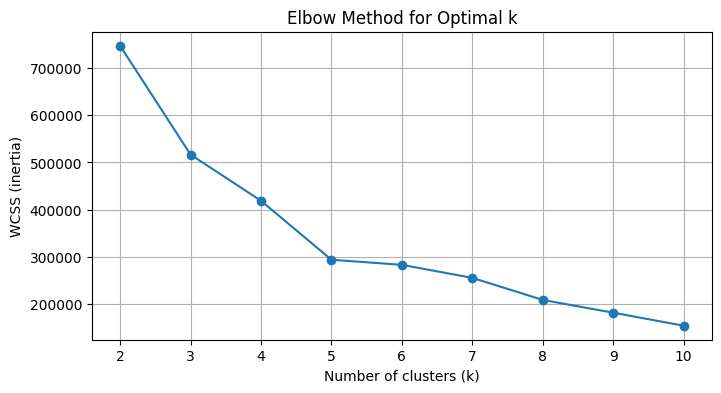

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_elbow_method(df_final_filled):
    # Drop only non-feature columns
    features = df_final_filled.drop(columns=["user_id", "segment", "cluster"], errors="ignore")

    # Confirm it's a DataFrame
    print(type(features))
    print(features.shape)  # Should be (num_rows, num_features)

    # Elbow method BEFORE final clustering
    wcss = []
    k_range = range(2, 11)  # You can adjust the range if needed

    for k_val in k_range:
        km = KMeans(n_clusters=k_val, random_state=42)
        km.fit(features)
        wcss.append(km.inertia_)

    # Plot the WCSS values for each k
    plt.figure(figsize=(8, 4))
    plt.plot(k_range, wcss, marker='o')
    plt.title("Elbow Method for Optimal k")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("WCSS (inertia)")
    plt.grid(True)
    plt.show()

plot_elbow_method(df_final_filled)

## Clustering and Feature Analysis of User Segments

In this final step, we perform a detailed analysis of the clusters and their most defining features. This allows us to further understand the underlying characteristics of the user segments and the features that contribute the most to differentiating between them.

1. **Clustering Process:**
After applying KMeans clustering to the data, each user is assigned to a specific cluster based on the features extracted and processed earlier. The clustering process aims to group users with similar preferences, behaviors, and attributes, creating meaningful segments within the dataset.

2. **Assigning Clusters to Users:**
Once the clustering is complete, we assign a final cluster to each user by performing a majority vote based on the cluster assignments of the user's records. In cases where there is a tie, a random tiebreaker is applied. This step ensures that each user is associated with the cluster that best represents their preferences, based on the majority of their records.

3. **Segment-Cluster Association:**
After assigning final clusters to users, we associate each cluster with the most common segment of users within that cluster. The segment most represented in each cluster is identified as the "representative segment." This allows us to understand the connection between the clustering results and the predefined user segments, providing further insights into the relationship between user behavior and their demographic attributes.

4. **Success Rate Calculation:**
A success rate is then calculated for each cluster by determining how many users in that cluster belong to the representative segment. This ratio provides a measure of how well the clusters align with the initial segments, offering a validation of the clustering process and its relevance to the problem at hand.

5. **Identifying Top Features per Cluster:**
To gain deeper insights into the distinguishing characteristics of each cluster, we calculate the mean values of all features within each cluster. By sorting the features in descending order, we can identify the top N features (default is 5) that most influence the characteristics of each cluster. These features represent the most important attributes that define the users in each cluster. For example, these could include factors like preferred music genre, age group, or listening context.

6. **Result Interpretation:**
The results of this analysis help us interpret the key characteristics of each cluster. By looking at the top features for each cluster, we can identify what drives the clustering process and how different user behaviors and attributes contribute to the formation of distinct segments. This understanding provides valuable insights into user preferences and helps in better targeting and personalization strategies.

Through these steps, we not only cluster users based on their attributes but also gain a deeper understanding of the specific factors that differentiate these groups. This approach enhances our ability to interpret user behavior and create more targeted solutions in future steps of the analysis.

In [ ]:
from sklearn.cluster import KMeans

def perform_kmeans_clustering(k, df_final_filled):
    """
    Perform KMeans clustering on the df_final_filled DataFrame.

    Parameters:
    - k: int, number of clusters
    - df_final_filled: DataFrame, the input dataframe containing the data

    Returns:
    - df_final_filled: DataFrame, the dataframe with a new column 'cluster' added
    """
    # Step 1: Drop non-feature columns
    features = df_final_filled.drop(columns=["user_id", "segment"], errors="ignore")

    # Step 2: Fit KMeans on the raw (non-scaled) data
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(features)

    # Step 3: Add the cluster assignment back to the DataFrame
    df_final_filled["cluster"] = clusters

    return df_final_filled

# Example usage:
df_final_filled = perform_kmeans_clustering(k=4, df_final_filled=df_final_filled)


In [ ]:
# Preview result
print(df_final_filled[["user_id", "segment", "cluster"]].head())

   user_id  segment  cluster
0      198        2        2
1      342        4        2
2      256        3        1
3      268        3        1
4      161        2        3


In [ ]:
# to see how good the ratings are allocated in clusters

df_final_filled['cluster'].value_counts()

,count
cluster,
1,4830
2,4008
0,3092
3,3084


In [ ]:
import pandas as pd
import numpy as np

def assign_final_clusters(df_final_filled):
    """
    Assigns final clusters to users based on majority vote with random tiebreaker.

    Parameters:
    - df_final_filled: DataFrame, input dataframe with 'user_id', 'segment', and 'cluster' columns

    Returns:
    - df_user_cluster: DataFrame, final dataframe with 'user_id', 'segment', and 'final_cluster'
    """

    # Function to get majority cluster with random tie-breaker
    def majority_vote_with_random_tiebreak(series):
        counts = series.value_counts()
        top_count = counts.max()
        top_clusters = counts[counts == top_count].index.tolist()
        return np.random.choice(top_clusters)  # random choice among ties

    # Step 1: Apply per user_id
    user_clusters = df_final_filled.groupby("user_id")["cluster"].apply(majority_vote_with_random_tiebreak).reset_index()

    # Step 2: Optionally add segment info (taking first one per user)
    user_segments = df_final_filled.groupby("user_id")["segment"].first().reset_index()

    # Step 3: Merge to get final dataframe
    df_user_cluster = pd.merge(user_clusters, user_segments, on="user_id")

    # Step 4: Rename cluster column for clarity
    df_user_cluster.rename(columns={"cluster": "final_cluster"}, inplace=True)

    return df_user_cluster

# Example usage:
df_user_cluster = assign_final_clusters(df_final_filled)


In [ ]:
#users per cluster

df_user_cluster['final_cluster'].value_counts()

,count
final_cluster,
1,229
2,104
3,84
0,83


In [ ]:
import pandas as pd

def summarize_cluster_info(df_user_cluster):
    """
    Summarizes cluster information, including most common segment and total users per cluster.

    Parameters:
    - df_user_cluster: DataFrame, input dataframe with 'user_id', 'segment', and 'final_cluster' columns

    Returns:
    - summary: DataFrame, contains summary with cluster, most common segment, segment count, and total users
    """

    # Step 1: Count total users per cluster
    cluster_user_counts = df_user_cluster["final_cluster"].value_counts().reset_index()
    cluster_user_counts.columns = ["cluster", "total_users"]

    # Step 2: Group by cluster and segment, then count
    cluster_segment_counts = df_user_cluster.groupby(["final_cluster", "segment"]).size().reset_index(name="segment_count")

    # Step 3: Get the most common segment per cluster
    most_common_segments = cluster_segment_counts.sort_values(["final_cluster", "segment_count"], ascending=[True, False]) \
                                                 .drop_duplicates(subset=["final_cluster"])

    # Step 4: Merge with total user counts
    summary = pd.merge(most_common_segments, cluster_user_counts, left_on="final_cluster", right_on="cluster")

    # Clean up and rename columns
    summary = summary[["cluster", "segment", "segment_count", "total_users"]]
    summary.rename(columns={"segment": "most_common_segment"}, inplace=True)
    summary.rename(columns={"segment_count": "users_most_common_segment"}, inplace=True)
    summary.rename(columns={"total_users": "cluster_total_users"}, inplace=True)

    summary['success_rate'] = summary['users_most_common_segment'] / summary['cluster_total_users']

    return summary

# Example usage:
summary = summarize_cluster_info(df_user_cluster)
print(summary)


   cluster  most_common_segment  users_most_common_segment  \
0        0                    5                         60   
1        1                    3                         81   
2        2                    2                         55   
3        3                    1                         36   

   cluster_total_users  success_rate  
0                   83      0.722892  
1                  229      0.353712  
2                  104      0.528846  
3                   84      0.428571  


In [ ]:
import pandas as pd

def get_top_features_per_cluster(df_final_filled, top_n=5):
    """
    Groups by cluster, calculates the mean of all features, and returns the top N features for each cluster.

    Parameters:
    - df_final_filled: DataFrame, input dataframe with features and a 'cluster' column
    - top_n: int, number of top features to return per cluster (default is 5)

    Returns:
    - top_features_per_cluster: dict, keys are cluster ids and values are Series of the top N features for each cluster
    """

    # Step 1: Group by cluster and calculate mean of all features
    cluster_feature_means = df_final_filled.groupby("cluster").mean(numeric_only=True)

    # Step 2: Drop user_id if it's accidentally included
    cluster_feature_means = cluster_feature_means.drop(columns=["user_id", 'segment'], errors="ignore")

    # Step 3: For each cluster, get top N features (e.g., top 5)
    top_features_per_cluster = {}

    for cluster_id in cluster_feature_means.index:
        sorted_features = cluster_feature_means.loc[cluster_id].sort_values(ascending=False)
        top_features_per_cluster[cluster_id] = sorted_features.head(top_n)

    return top_features_per_cluster

# Example usage:
top_features_per_cluster = get_top_features_per_cluster(df_final_filled, top_n=5)

# Display the result
for cluster_id, features in top_features_per_cluster.items():
    print(f"\nCluster {cluster_id} - Top {5} Features:")
    print(features)



Cluster 0 - Top 5 Features:
positive_vibes_group_low        3.979625
language_English                1.471539
cover_remix_Cover               0.840233
release_year_group_2000_2010    0.027167
collaboration                   0.025226
Name: 0, dtype: float64

Cluster 1 - Top 5 Features:
positive_vibes_group_high    5.182816
positive_vibes_group_low     3.992340
language_English             1.375155
cover_remix_Cover            0.667288
listening_context_party      0.185714
Name: 1, dtype: float64

Cluster 2 - Top 5 Features:
favorite_genre_pop          5.551397
positive_vibes_group_low    1.820858
language_English            1.197605
cover_remix_Cover           0.704591
listening_context_party     0.098802
Name: 2, dtype: float64

Cluster 3 - Top 5 Features:
language_English                1.373217
cover_remix_Cover               0.895266
release_year_group_2000_2010    0.040208
collaboration                   0.022698
release_year_group_<1990        0.000973
Name: 3, dtype: float64


## Create the final learn_segments() function

In this section, we created the learn_segments() function, which automates the process of preparing data, performing clustering, and extracting insights about user segments based on their ratings. This function takes the number of clusters (k_clusters) and a dataframe of user ratings (df_ratings) as input. It first preprocesses the user data, extracts the most important features using LIME, then applies KMeans clustering, and finally assigns each user to a cluster.

We performed the analysis with two different numbers of clusters: in one case, we used 4 clusters for our initial analysis, and in the final step that we called the function, we used 5 clusters(that we know in advance that is the correct number of different personalities) to compare the results. The function returns a summary of the clustering process, including the most common segment within each cluster and a success rate, as well as the top features that define each cluster.

In [ ]:
def learn_segments(k_clusters=5, df=df_ratings):
  df_enncoded_final=preprocess_user_data(df)
  df_final_filled=explain_and_parse_features(df_enncoded_final)
  df_final_filled = perform_kmeans_clustering(k=k_clusters, df_final_filled=df_final_filled)
  df_user_cluster = assign_final_clusters(df_final_filled)
  summary = summarize_cluster_info(df_user_cluster)
  top_features_per_cluster = get_top_features_per_cluster(df_final_filled, top_n=7)
  return summary, top_features_per_cluster



In [ ]:
summary, top_features_per_cluster = learn_segments(k_clusters=5, df=df_ratings)

Explaining Predictions: 100%|██████████| 15014/15014 [2:27:52<00:00,  1.69it/s]


In [ ]:
summary

,cluster,most_common_segment,users_most_common_segment,cluster_total_users,success_rate
0,0,5,64,89,0.719101
1,1,3,81,220,0.368182
2,2,2,34,64,0.531250
3,3,2,21,40,0.525000
4,4,1,36,87,0.413793


In [ ]:
# Display the result
for cluster_id, features in top_features_per_cluster.items():
    print(f"\nCluster {cluster_id} - Top {5} Features:")
    print(features)


Cluster 0 - Top 5 Features:
positive_vibes_group_low        3.984799
language_English                1.474774
cover_remix_Cover               0.896507
release_year_group_2000_2010    0.026197
collaboration                   0.016818
listening_context_workout       0.005175
duration_group_long             0.000970
Name: 0, dtype: float64

Cluster 1 - Top 5 Features:
positive_vibes_group_high       5.176812
positive_vibes_group_low        3.988406
language_English                1.367495
cover_remix_Cover               0.672257
listening_context_party         0.168944
release_year_group_2000_2010    0.027329
collaboration                   0.010145
Name: 1, dtype: float64

Cluster 2 - Top 5 Features:
favorite_genre_pop              5.551957
language_English                1.214596
cover_remix_Cover               0.671339
release_year_group_2000_2010    0.041566
collaboration                   0.024166
listening_context_workout       0.009183
listening_context_party         0.008217
Name

# Coclusion and Observations

The clustering analysis and feature importance extraction offer valuable insights into the relationships between user preferences and their segments. However, several observations and challenges emerged throughout the process:

1. Strong Associations in Some Clusters: The method worked exceptionally well for certain clusters. For instance, Cluster 0 demonstrated a strong connection to Segment 5, where approximately 71.91% of the users were coming from this segment. This suggests that the features identified for this cluster align closely with the characteristics of Segment 5, making it relatively easy to assign users to the correct cluster based on their segment.

2. Feature Overlap and Attribute Identification: For other clusters, such as Cluster 2 and Cluster 3, there was an identifiable trend that linked them to Segment 2, with success rates of 53.1% and 52.5%, respectively. Both clusters showed a significant overlap in terms of music preferences, specifically related to the genre "Pop." However, the complexity of the problem becomes evident here: while the clustering helped to highlight a relationship between user preferences (e.g., favorite genre), the overlap of features and the involvement of random factors make it difficult to precisely identify the core attributes of each segment.

3. Challenges in Identifying Initial Personalities: The overall process revealed the inherent difficulty in capturing the "personalities" of users based solely on their behavior and preferences. The presence of random factors, such as personal preferences, coupled with feature overlap across segments, complicates the process. Furthermore, user behavior is coming from distributions and random factors, and thus, some users may not fall neatly into predefined categories, making the cluster assignments less reliable. This complexity highlights the challenge of identifying clear and definitive characteristics for each segment, especially in a large dataset with diverse user types.

4. Time Consumption and Computational Effort: The method used, particularly with the integration of LIME (Local Interpretable Model-agnostic Explanations) to derive feature importance, proved to be time-consuming. As LIME evaluates individual instances one-by-one to explain predictions, this can take a significant amount of time, especially with large datasets. Additionally, since the clustering process involves multiple steps (including K-Means clustering and majority voting for final cluster assignments), the overall process becomes computationally expensive.

5. Complexity of Segmentation and Clustering: The task of associating users with initial segments based on feature importance and clustering is complex, as it requires accurately interpreting and balancing a variety of factors, including user preferences, behavior, and demographic attributes. Furthermore, the method relies heavily on the assumption that the features derived from the LIME explanations are representative of the segments, but there is no guarantee that every user will align perfectly with a specific cluster.

Final Thoughts

In conclusion, while the approach has provided meaningful insights and demonstrated that certain clusters are well-aligned with the initial segments, there are still several challenges to address, including feature overlap, the dynamic nature of user behavior, and the complexity of the clustering process itself. The results indicate that some clusters are more interpretable and connected to specific segments, while others remain more ambiguous. Further refinement in the clustering process, along with potentially more sophisticated modeling techniques, could improve the accuracy and interpretability of the results.